In [21]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
mnist = input_data.read_data_sets("data/", one_hot=True)
x = tf.placeholder(tf.float32, [None, 784])
y_actual = tf.placeholder(tf.float32, shape=[None, 10])
W = tf.Variable(tf.zeros([784,10]))        
b = tf.Variable(tf.zeros([10]))            #初始化偏置项b
y_predict = tf.nn.softmax(tf.matmul(x,W) + b)     #加权变换并进行softmax回归，得到预测概率


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [22]:
train_epochs=50
batch_size=100
total_batch=int(mnist.train.num_examples/batch_size)
display_step=1
learning_rate=0.01

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_actual*tf.log(y_predict),reduction_indices=1))   #求交叉熵
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)   #用梯度下降法使得残差最小

correct_prediction = tf.equal(tf.argmax(y_predict,1), tf.argmax(y_actual,1))   #在测试阶段，测试准确度计算
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))                #多个批次的准确度均值



sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

In [23]:
for epoch in range(train_epochs):
    for batch in range(total_batch):            
       batch_xs, batch_ys = mnist.train.next_batch(batch_size)          
       sess.run(train_step, feed_dict={x: batch_xs, y_actual: batch_ys})   
    loss,acc=sess.run([cross_entropy,accuracy],feed_dict={x:mnist.validation.images,y_actual:mnist.validation.labels})
    if (epoch+1) % display_step==0:
        print("Train Epoch:",'%02d' % (epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=","{:.4f}".format(acc))
print("Train finished")

Train Epoch: 01 Loss= 0.753412604 Accuracy= 0.8498
Train Epoch: 02 Loss= 0.572765112 Accuracy= 0.8720
Train Epoch: 03 Loss= 0.499711901 Accuracy= 0.8800
Train Epoch: 04 Loss= 0.458142370 Accuracy= 0.8846
Train Epoch: 05 Loss= 0.431026548 Accuracy= 0.8898
Train Epoch: 06 Loss= 0.411364049 Accuracy= 0.8922
Train Epoch: 07 Loss= 0.396668404 Accuracy= 0.8956
Train Epoch: 08 Loss= 0.384493172 Accuracy= 0.8976
Train Epoch: 09 Loss= 0.374749035 Accuracy= 0.8984
Train Epoch: 10 Loss= 0.366790205 Accuracy= 0.9004
Train Epoch: 11 Loss= 0.359605432 Accuracy= 0.9026
Train Epoch: 12 Loss= 0.353684217 Accuracy= 0.9042
Train Epoch: 13 Loss= 0.348570466 Accuracy= 0.9050
Train Epoch: 14 Loss= 0.343925565 Accuracy= 0.9070
Train Epoch: 15 Loss= 0.339630604 Accuracy= 0.9084
Train Epoch: 16 Loss= 0.336124986 Accuracy= 0.9100
Train Epoch: 17 Loss= 0.332507014 Accuracy= 0.9096
Train Epoch: 18 Loss= 0.329664767 Accuracy= 0.9110
Train Epoch: 19 Loss= 0.326657504 Accuracy= 0.9112
Train Epoch: 20 Loss= 0.3241276

In [15]:
accu_test=sess.run(accuracy,feed_dict={x:mnist.test.images,y_actual:mnist.test.labels})
print("Test Accuracy:",accu_test)

Test Accuracy: 0.9197


In [20]:
pre_result=sess.run(tf.argmax(y_predict,1),feed_dict={x:mnist.test.images})
pre_result[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [26]:
def plot_image_pred(images,labels,prediction,index,num=10):
    fig=plt.gcf()
    fig.set_size_inches(10,12)
    if num>20:
        num=20
    for i in range(0,num):
        ax=plt.subplot(5,5,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap="binary")
        title="label="+str(np.argmax(labels[index]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[index])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index+=1
    plt.show()

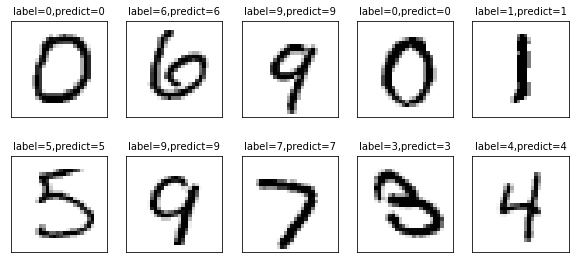

In [27]:
plot_image_pred(mnist.test.images,mnist.test.labels,pre_result,10,10)